# Rice Exports Data Analysis

## Overview

This project involves the analysis of a comprehensive dataset containing detailed information about rice exports from various exporters worldwide. The dataset includes crucial attributes such as importer/exporter names, addresses, quantities, values, and other pertinent details.

## Technologies Used

- Data Cleansing
- Exploratory Data Analysis (EDA)
- Data Visualization using PowerBI/Tableau/Streamlit

## Domain

Fast Moving Consumer Goods (FMCG)

## Problem Statement

The goal of this project is to conduct an extensive data analysis to extract meaningful insights and address key questions related to rice export transactions. The analysis will cover the following processes:

1. Data Cleansing: Ensure data quality by identifying and rectifying any inconsistencies or errors.
2. Exploratory Data Analysis (EDA): Analyze the dataset to discover patterns, relationships, and trends.
3. Visualization: Streamlit app to create visualizations that effectively communicate the insights derived from the data.

## 1. Data Cleaning and Exploration:
- Thoroughly explore the dataset to comprehend its structure and identify potential issues such as
missing or inconsistent values.
- Implement data cleaning procedures to address missing values, correct inconsistencies, and
handle outliers.
- Provide a summary highlighting the dataset's basic statistics and characteristics

In [1]:
# initial imports
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('ggplot') 
import os 
import geopandas as gpd

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading files
df_19 = pd.read_csv(r"Rice Exporters 2019 - Trade Atlas Records - Jan.csv")
df_20 = pd.read_csv(r"Rice Exporters 2020 - Jan.csv")
df_21 = pd.read_csv(r"Rice Exporters 2021 - January.csv")
df_22 = pd.read_csv(r"Rice Exporters 2022 - Jan.csv")

In [3]:
df_19.shape,df_20.shape,df_21.shape, df_22.shape

((5655, 46), (6552, 46), (7387, 48), (8699, 46))

The data from 2021 has two extra columns

In [4]:
data = [df_19, df_20, df_21, df_22]

for i in data:
    print(i.columns)

Index(['NO', 'ARRIVAL DATE', 'HS CODE', 'HS CODE DESCRIPTION', 'IMPORTER NAME',
       'IMPORTER ADDRESS', 'IMPORTER COUNTRY', 'CITY STATE', 'TEL', 'FAX',
       'E-MAIL', 'WEB', 'EXPORTER NAME', 'EXPORTER ADDRESS',
       'COUNTRY OF ORIGIN', 'IMPORT VALUE FOB', 'IMPORT VALUE CIF', 'CURRENCY',
       'NET WEIGHT', 'NET WEIGHT UNIT', 'GROSS WEIGHT', 'GROSS WEIGHT UNIT',
       'QUANTITY', 'QUANTITY UNIT', 'PRODUCT DETAILS', 'NUMBER OF PACKAGES',
       'PACKAGES UNIT', 'INCOTERMS', 'PLACE OF DELIVERY', 'BRAND NAME',
       'MANUFACTORING COMPANY', 'PORT OF ARRIVAL', 'PORT OF DEPARTURE',
       'NOTIFY PARTY', 'NOTIFY ADDRESS', 'VOLUME', 'VOLUME UNIT', 'PREPORT',
       'SHIPPER COUNTRY', 'US STATE', 'US PORT2', 'FINAL US PORT',
       'FINAL FOREIGN PORT', 'FINAL COUNTRY', 'CONTAINER COUNT', 'TOTAL TEUS'],
      dtype='object')
Index(['NO', 'ARRIVAL DATE', 'HS CODE', 'HS CODE DESCRIPTION', 'IMPORTER NAME',
       'IMPORTER ADDRESS', 'IMPORTER COUNTRY', 'CITY STATE', 'TEL', 'FAX',
     

In [5]:
def find_diff_col(df1,df2):
    cols_df1 = set(df1.columns)
    cols_df2 = set(df2.columns)
    
    diff_cols = list(cols_df1.symmetric_difference(cols_df2))
    return diff_cols

find_diff_col(df_19, df_21)

['Final Qty', 'PORT OF DEPARTURE.1']

In [6]:
df_21 = df_21.drop(columns=['PORT OF DEPARTURE.1', 'Final Qty'], errors='ignore')

In [7]:
def merge_data(lst, output_file):
    merged_data = pd.DataFrame()
    for df_ in lst:
        merged_data = merged_data.append(df_, ignore_index=True)
    merged_data.to_csv(output_file, index=False)
    print(f"Merged data saved to {output_file}")

data = [df_19, df_20, df_21, df_22]
output_file = "merged_data.csv"  
merge_data(data,output_file= output_file)

Merged data saved to merged_data.csv


In [8]:
df = pd.read_csv(r'merged_data.csv')

In [9]:
df.head()

,NO,ARRIVAL DATE,HS CODE,HS CODE DESCRIPTION,IMPORTER NAME,IMPORTER ADDRESS,IMPORTER COUNTRY,CITY STATE,TEL,FAX,...,VOLUME UNIT,PREPORT,SHIPPER COUNTRY,US STATE,US PORT2,FINAL US PORT,FINAL FOREIGN PORT,FINAL COUNTRY,CONTAINER COUNT,TOTAL TEUS
0,1,30-01-2019,10063020,Basmati Rice,NATRAJ FOOD STUFF FACTORY,.,United Arab Emirates,United Arab Emirates,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,2,30-01-2019,10063020,Basmati Rice,KV A GENERAL TRADING LLC.,.,United Arab Emirates,United Arab Emirates,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3,30-01-2019,10063010,"Rice, parboiled",NIRAPARA MIDDLEEAST GENERALTRAD LLC.,.,United Arab Emirates,United Arab Emirates,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,4,30-01-2019,10063010,"Rice, parboiled",MATSYA OVER SEASLTD.,.,United Arab Emirates,United Arab Emirates,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,5,30-01-2019,10063090,Rice Excptg Parboiled (Excl Basmati Rice),SARAVANA FOOD STUFF FACTORY LLC.,.,United Arab Emirates,United Arab Emirates,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [10]:
df.shape

(28293, 46)

In [11]:
df.isna().sum()

NO                           0
ARRIVAL DATE                 0
HS CODE                      0
HS CODE DESCRIPTION        147
IMPORTER NAME              131
IMPORTER ADDRESS           292
IMPORTER COUNTRY             0
CITY STATE                   6
TEL                        628
FAX                        728
E-MAIL                     525
WEB                       1139
EXPORTER NAME              145
EXPORTER ADDRESS          1226
COUNTRY OF ORIGIN            0
IMPORT VALUE FOB             0
IMPORT VALUE CIF             0
CURRENCY                   425
NET WEIGHT                   0
NET WEIGHT UNIT          26840
GROSS WEIGHT                 0
GROSS WEIGHT UNIT        26829
QUANTITY                     0
QUANTITY UNIT              534
PRODUCT DETAILS            377
NUMBER OF PACKAGES           0
PACKAGES UNIT            27641
INCOTERMS                27716
PLACE OF DELIVERY        27959
BRAND NAME               27925
MANUFACTORING COMPANY    28031
PORT OF ARRIVAL            824
PORT OF 

In [12]:
df.describe()

,NO,HS CODE,IMPORT VALUE FOB,IMPORT VALUE CIF,NET WEIGHT,GROSS WEIGHT,QUANTITY,NUMBER OF PACKAGES,VOLUME,VOLUME UNIT,PREPORT,US STATE,US PORT2,FINAL US PORT,FINAL FOREIGN PORT,FINAL COUNTRY,CONTAINER COUNT,TOTAL TEUS
count,28293.000000,2.829300e+04,2.829300e+04,2.829300e+04,2.829300e+04,2.829300e+04,2.829300e+04,28293.000000,28293.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28293.000000,28293.000000
mean,3625.921465,8.487098e+07,1.887279e+06,1.637299e+06,3.313317e+04,4.192328e+04,3.039297e+04,179.509172,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042060,0.025236
std,2192.102644,7.384568e+08,3.961334e+07,4.307003e+07,2.085436e+06,2.532250e+06,2.075450e+06,8401.658616,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563008,0.487218
min,1.000000,1.006300e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,1769.000000,1.006301e+07,3.410000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,3537.000000,1.006302e+07,1.793880e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,5305.000000,1.006309e+07,6.600000e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
max,8699.000000,1.006310e+10,4.781290e+09,5.399120e+09,2.600000e+08,2.600000e+08,2.600000e+08,788000.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,35.000000


In [13]:
df.columns

Index(['NO', 'ARRIVAL DATE', 'HS CODE', 'HS CODE DESCRIPTION', 'IMPORTER NAME',
       'IMPORTER ADDRESS', 'IMPORTER COUNTRY', 'CITY STATE', 'TEL', 'FAX',
       'E-MAIL', 'WEB', 'EXPORTER NAME', 'EXPORTER ADDRESS',
       'COUNTRY OF ORIGIN', 'IMPORT VALUE FOB', 'IMPORT VALUE CIF', 'CURRENCY',
       'NET WEIGHT', 'NET WEIGHT UNIT', 'GROSS WEIGHT', 'GROSS WEIGHT UNIT',
       'QUANTITY', 'QUANTITY UNIT', 'PRODUCT DETAILS', 'NUMBER OF PACKAGES',
       'PACKAGES UNIT', 'INCOTERMS', 'PLACE OF DELIVERY', 'BRAND NAME',
       'MANUFACTORING COMPANY', 'PORT OF ARRIVAL', 'PORT OF DEPARTURE',
       'NOTIFY PARTY', 'NOTIFY ADDRESS', 'VOLUME', 'VOLUME UNIT', 'PREPORT',
       'SHIPPER COUNTRY', 'US STATE', 'US PORT2', 'FINAL US PORT',
       'FINAL FOREIGN PORT', 'FINAL COUNTRY', 'CONTAINER COUNT', 'TOTAL TEUS'],
      dtype='object')

In [14]:
# Removing columns which are not requried for the problem statement  
df =df[['NO', 'ARRIVAL DATE', 'HS CODE', 'HS CODE DESCRIPTION', 'IMPORTER NAME',
       'IMPORTER ADDRESS', 'IMPORTER COUNTRY', 'CITY STATE',
       # 'TEL', 'FAX',
       # 'E-MAIL', 'WEB', 
       'EXPORTER NAME', 'EXPORTER ADDRESS',
       'COUNTRY OF ORIGIN', 'IMPORT VALUE FOB', 'IMPORT VALUE CIF', 'CURRENCY',
       'NET WEIGHT', 
       # 'NET WEIGHT UNIT', 
       'GROSS WEIGHT', 
       # 'GROSS WEIGHT UNIT',
       'QUANTITY', 'QUANTITY UNIT', 'PRODUCT DETAILS', 'NUMBER OF PACKAGES',
       # 'PACKAGES UNIT', 'INCOTERMS', 'PLACE OF DELIVERY', 'BRAND NAME',
       # 'MANUFACTORING COMPANY',
       'PORT OF ARRIVAL', 'PORT OF DEPARTURE',
       # 'NOTIFY PARTY', 'NOTIFY ADDRESS',
       # 'VOLUME',  # 'VOLUME UNIT', # 'PREPORT',
       # 'SHIPPER COUNTRY',
       # 'US STATE', 'US PORT2', 'FINAL US PORT',
       # 'FINAL FOREIGN PORT', 'FINAL COUNTRY', 
       'CONTAINER COUNT', 'TOTAL TEUS']].copy()
df.head()

,NO,ARRIVAL DATE,HS CODE,HS CODE DESCRIPTION,IMPORTER NAME,IMPORTER ADDRESS,IMPORTER COUNTRY,CITY STATE,EXPORTER NAME,EXPORTER ADDRESS,...,NET WEIGHT,GROSS WEIGHT,QUANTITY,QUANTITY UNIT,PRODUCT DETAILS,NUMBER OF PACKAGES,PORT OF ARRIVAL,PORT OF DEPARTURE,CONTAINER COUNT,TOTAL TEUS
0,1,30-01-2019,10063020,Basmati Rice,NATRAJ FOOD STUFF FACTORY,.,United Arab Emirates,United Arab Emirates,"GREEN VILLAGE AGROS PVT.LTD.,","938 SEC.-13URBAN ESTATE ,KARNAL/HRY/TARAORI/...",...,0.0,0.0,52.02,MTS,"INDIAN ORIGIN 1121 STEAM BASMATI RICE, P",0.0,Jebel Ali,MUNDRA SEA (INMUN1),0,0
1,2,30-01-2019,10063020,Basmati Rice,KV A GENERAL TRADING LLC.,.,United Arab Emirates,United Arab Emirates,FAUJI EXIM PRIVATE LIMITED,"100, SAINIK VIHARPITAM PURA ,DELHI ,110034 ,...",...,0.0,0.0,6.30,MTS,"1121 RAW BASMATI RICE SORTEX, CROP 2016,",0.0,Jebel Ali,MUNDRA SEA (INMUN1),0,0
2,3,30-01-2019,10063010,"Rice, parboiled",NIRAPARA MIDDLEEAST GENERALTRAD LLC.,.,United Arab Emirates,United Arab Emirates,K K R AGRO MILLS PRIVATE LIMITED,"III/678, OKKAL P.O. KALADY, ERNAKULAM DIST. ,...",...,0.0,0.0,5300.00,KGS,2 KG JEERAKASALA RICE,0.0,Jebel Ali,COCHIN SEA (INCOK1),0,0
3,4,30-01-2019,10063010,"Rice, parboiled",MATSYA OVER SEASLTD.,.,United Arab Emirates,United Arab Emirates,VISHNU ENTERPRISES,"NO.545,J-2, BKR NAGAR, SATHY ROAD,GANDHIPURAM,...",...,0.0,0.0,26000.00,KGS,NON BASMATHI RICE (THANJAVOOR KURUVA RIC,0.0,Jebel Ali,TUTICORIN SEA (INTUT1),0,0
4,5,30-01-2019,10063090,Rice Excptg Parboiled (Excl Basmati Rice),SARAVANA FOOD STUFF FACTORY LLC.,.,United Arab Emirates,United Arab Emirates,LAKSHMI EXPORT AND IMPORT,"17/251, VECHISSERIL, THONDANKULANGARA, AVALAK...",...,0.0,0.0,156000.00,KGS,PONNI SAMBA RICE (NON BASMATI RICE) 156,0.0,Jebel Ali,TUTICORIN SEA (INTUT1),0,0


28293 

In [15]:
# checking null values 
df.isna().sum()

NO                        0
ARRIVAL DATE              0
HS CODE                   0
HS CODE DESCRIPTION     147
IMPORTER NAME           131
IMPORTER ADDRESS        292
IMPORTER COUNTRY          0
CITY STATE                6
EXPORTER NAME           145
EXPORTER ADDRESS       1226
COUNTRY OF ORIGIN         0
IMPORT VALUE FOB          0
IMPORT VALUE CIF          0
CURRENCY                425
NET WEIGHT                0
GROSS WEIGHT              0
QUANTITY                  0
QUANTITY UNIT           534
PRODUCT DETAILS         377
NUMBER OF PACKAGES        0
PORT OF ARRIVAL         824
PORT OF DEPARTURE      1363
CONTAINER COUNT           0
TOTAL TEUS                0
dtype: int64

In [16]:
df = df.dropna()
df

,NO,ARRIVAL DATE,HS CODE,HS CODE DESCRIPTION,IMPORTER NAME,IMPORTER ADDRESS,IMPORTER COUNTRY,CITY STATE,EXPORTER NAME,EXPORTER ADDRESS,...,NET WEIGHT,GROSS WEIGHT,QUANTITY,QUANTITY UNIT,PRODUCT DETAILS,NUMBER OF PACKAGES,PORT OF ARRIVAL,PORT OF DEPARTURE,CONTAINER COUNT,TOTAL TEUS
0,1,30-01-2019,10063020,Basmati Rice,NATRAJ FOOD STUFF FACTORY,.,United Arab Emirates,United Arab Emirates,"GREEN VILLAGE AGROS PVT.LTD.,","938 SEC.-13URBAN ESTATE ,KARNAL/HRY/TARAORI/...",...,0.0,0.0,52.02,MTS,"INDIAN ORIGIN 1121 STEAM BASMATI RICE, P",0.0,Jebel Ali,MUNDRA SEA (INMUN1),0,0
1,2,30-01-2019,10063020,Basmati Rice,KV A GENERAL TRADING LLC.,.,United Arab Emirates,United Arab Emirates,FAUJI EXIM PRIVATE LIMITED,"100, SAINIK VIHARPITAM PURA ,DELHI ,110034 ,...",...,0.0,0.0,6.30,MTS,"1121 RAW BASMATI RICE SORTEX, CROP 2016,",0.0,Jebel Ali,MUNDRA SEA (INMUN1),0,0
2,3,30-01-2019,10063010,"Rice, parboiled",NIRAPARA MIDDLEEAST GENERALTRAD LLC.,.,United Arab Emirates,United Arab Emirates,K K R AGRO MILLS PRIVATE LIMITED,"III/678, OKKAL P.O. KALADY, ERNAKULAM DIST. ,...",...,0.0,0.0,5300.00,KGS,2 KG JEERAKASALA RICE,0.0,Jebel Ali,COCHIN SEA (INCOK1),0,0
3,4,30-01-2019,10063010,"Rice, parboiled",MATSYA OVER SEASLTD.,.,United Arab Emirates,United Arab Emirates,VISHNU ENTERPRISES,"NO.545,J-2, BKR NAGAR, SATHY ROAD,GANDHIPURAM,...",...,0.0,0.0,26000.00,KGS,NON BASMATHI RICE (THANJAVOOR KURUVA RIC,0.0,Jebel Ali,TUTICORIN SEA (INTUT1),0,0
4,5,30-01-2019,10063090,Rice Excptg Parboiled (Excl Basmati Rice),SARAVANA FOOD STUFF FACTORY LLC.,.,United Arab Emirates,United Arab Emirates,LAKSHMI EXPORT AND IMPORT,"17/251, VECHISSERIL, THONDANKULANGARA, AVALAK...",...,0.0,0.0,156000.00,KGS,PONNI SAMBA RICE (NON BASMATI RICE) 156,0.0,Jebel Ali,TUTICORIN SEA (INTUT1),0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28287,8694,01-01-2022,10063010,"Rice, parboiled",HASSON FOOD COMPANY PTE.LTD.,.,Singapore,Singapore,A DURAISAMY MODERN RICE MILL,"4/354, KARIA PERUMAL KARADU ROAD,NETHIMEDU, ...",...,0.0,0.0,2.50,MTS,Seeraga Samba Rice,0.0,Singapore,CHENNAI SEA (INMAA1),0,0
28288,8695,01-01-2022,10063010,"Rice, parboiled",SRI AMBIKAS PTE.LTD.,.,Singapore,Singapore,TRISHAKTHI VARAHI FOODS PRIVATE LIMITED,", , , ,",...,0.0,0.0,90.00,NOS,ABIRAMI SONAMASOORI PARBOILED RICE 25 KG,0.0,Singapore,CHENNAI SEA (INMAA1),0,0
28290,8697,01-01-2022,10063090,Rice Excptg Parboiled (Excl Basmati Rice),TO,"AVANTI PRODUCTS, LLC,, 10880 NW 30TH ST. MIAMI...",United States,Rhode Island,SHREE GAJANAN INDUSTRIES,"6-20-200 NEAR RAILWAY GATENIZAMABAD ,ANDHRA ...",...,0.0,0.0,50.00,PCS,Indian Non Basmati Rice (DETAILS AS PER,0.0,Houston,NHAVA SHEVA SEA (INNSA1),0,0
28291,8698,01-01-2022,10063090,Rice Excptg Parboiled (Excl Basmati Rice),TO,"AVANTI PRODUCTS, LLC,, 10880 NW 30TH ST. MIAMI...",United States,Rhode Island,SHREE GAJANAN INDUSTRIES,"6-20-200 NEAR RAILWAY GATENIZAMABAD ,ANDHRA ...",...,0.0,0.0,1000.00,PCS,Indian Non Basmati Rice (DETAILS AS PER,0.0,Houston,NHAVA SHEVA SEA (INNSA1),0,0


In [17]:
df.duplicated().sum()

0

In [18]:
df.describe()

,NO,HS CODE,IMPORT VALUE FOB,IMPORT VALUE CIF,NET WEIGHT,GROSS WEIGHT,QUANTITY,NUMBER OF PACKAGES,CONTAINER COUNT,TOTAL TEUS
count,26092.000000,2.609200e+04,2.609200e+04,2.609200e+04,26092.000000,26092.000000,26092.000000,26092.000000,26092.000000,26092.000000
mean,3662.442549,1.006228e+07,8.272876e+05,1.252081e+02,11.889276,1130.573357,5645.389361,19.372068,0.035911,0.007397
std,2204.030393,8.722029e+04,1.447708e+07,1.385294e+04,899.595901,18184.522554,26677.357046,307.108273,0.578357,0.379800
min,1.000000,1.006300e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1804.750000,1.006301e+07,3.788793e+03,0.000000e+00,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000
50%,3578.500000,1.006302e+07,1.751626e+04,0.000000e+00,0.000000,0.000000,102.000000,0.000000,0.000000,0.000000
75%,5348.250000,1.006309e+07,6.120000e+04,0.000000e+00,0.000000,0.000000,598.250000,0.000000,0.000000,0.000000
max,8699.000000,1.006310e+07,1.186350e+09,1.592240e+06,84000.000000,912367.000000,920000.000000,10400.000000,20.000000,35.000000


### Checking and removing Outliers

<AxesSubplot: xlabel='IMPORT VALUE FOB'>

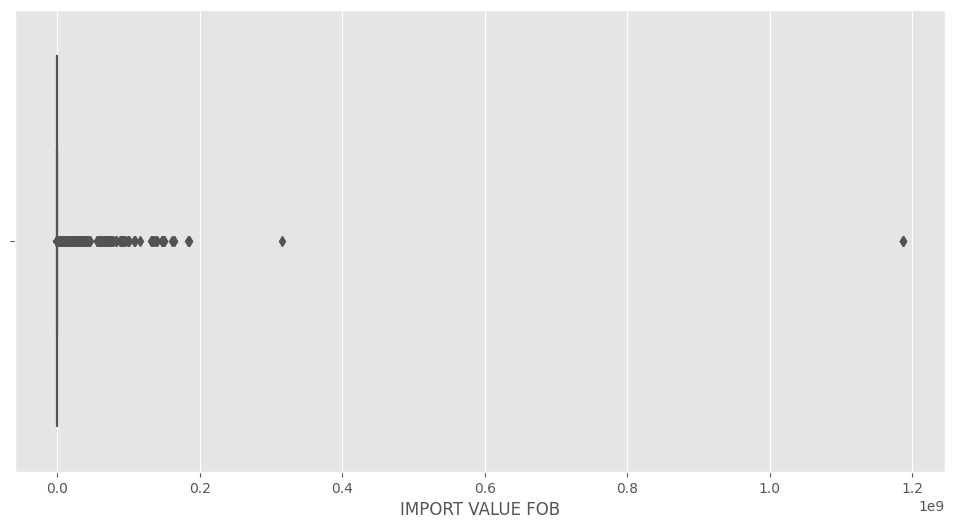

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'IMPORT VALUE FOB')

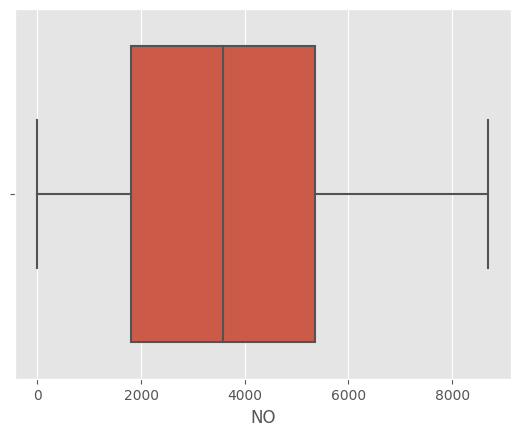

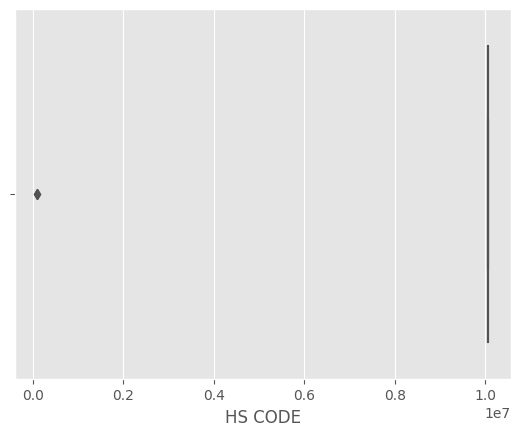

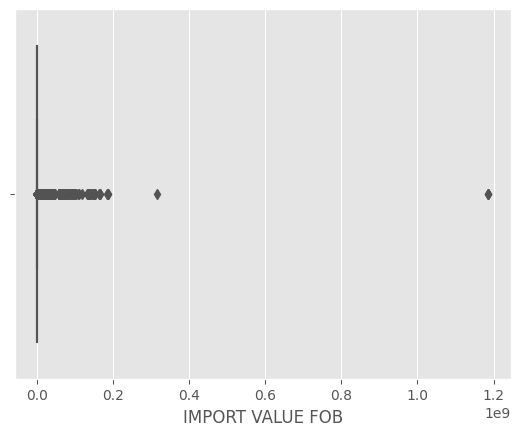

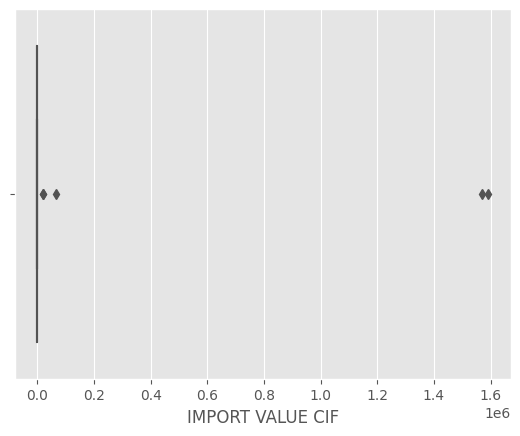

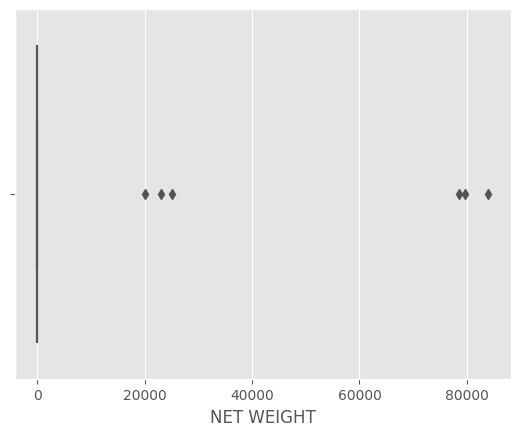

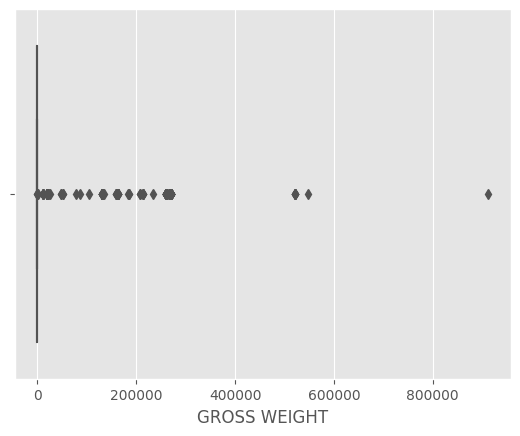

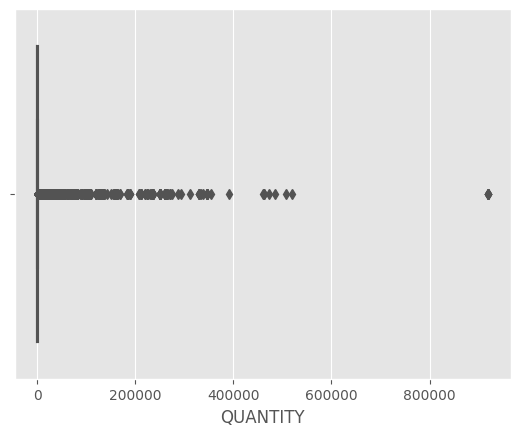

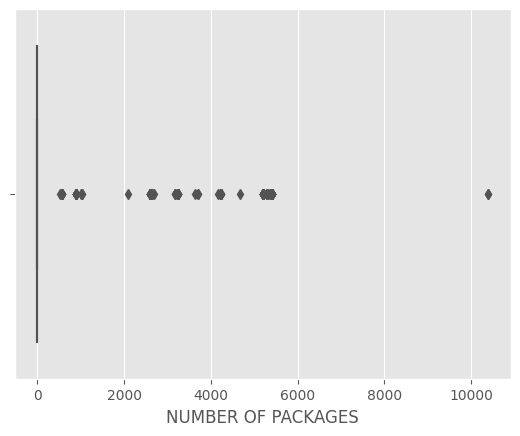

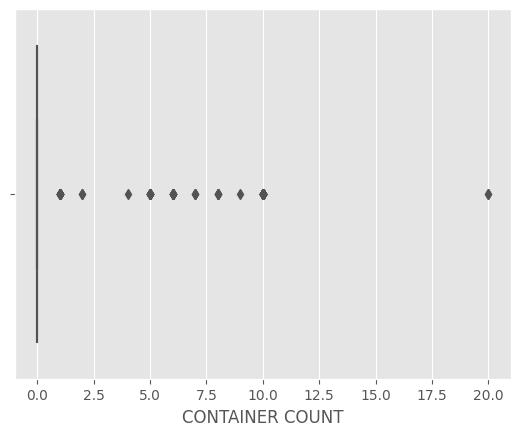

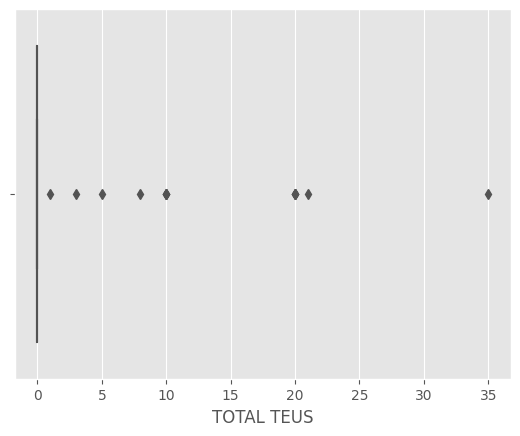

In [20]:
num_col = [i for i in df.columns if df[i].dtype == 'int64' or df[i].dtype == 'float64']

for col in num_col:
    sns.boxplot(data= df, x = col)
    plt.show()

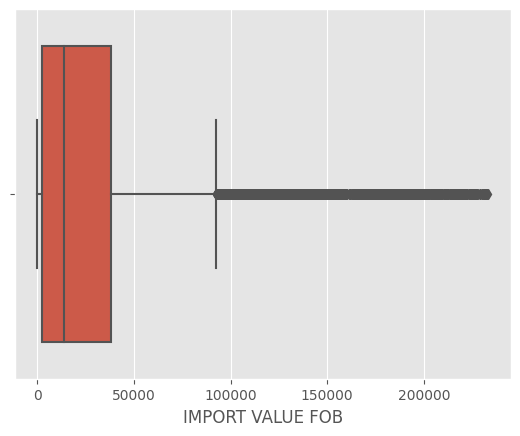

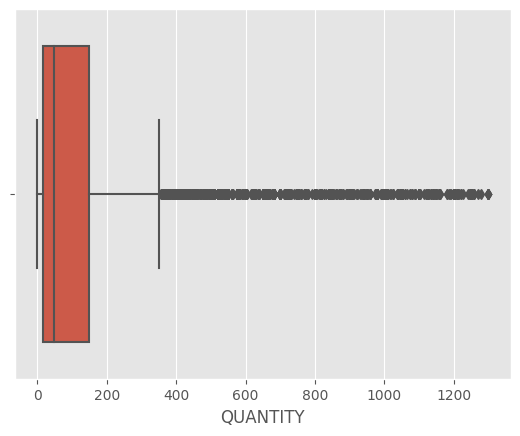

In [21]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers

for col in ['IMPORT VALUE FOB','QUANTITY',]:
    df = remove_outliers(df, col)
    
for col in ['IMPORT VALUE FOB','QUANTITY',]:
    sns.boxplot(data= df, x = col)
    plt.show()

In [22]:
df.shape

(19174, 24)

- almost 32% of data is been reduced after removing outliers (With 3x IQR)
- almost 37% of data is been reduced after removing outliers (With 1.5x IQR) 

> Hence I am using 3x IQR formula 

### Observation of the Data

In [23]:
df.describe()

,NO,HS CODE,IMPORT VALUE FOB,IMPORT VALUE CIF,NET WEIGHT,GROSS WEIGHT,QUANTITY,NUMBER OF PACKAGES,CONTAINER COUNT,TOTAL TEUS
count,19174.000000,1.917400e+04,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000
mean,3560.977313,1.006304e+07,30645.813961,3.460937,4.380933,1087.352093,137.661092,22.178314,0.041202,0.000887
std,2130.129424,3.540201e+01,43292.999282,479.236641,606.628660,16731.031032,226.359969,335.013050,0.631806,0.071852
min,1.000000,1.006301e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1767.000000,1.006301e+07,2271.750000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
50%,3490.500000,1.006302e+07,13855.600000,0.000000,0.000000,0.000000,47.950000,0.000000,0.000000,0.000000
75%,5187.000000,1.006309e+07,38298.510000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000
max,8699.000000,1.006310e+07,233412.500000,66360.000000,84000.000000,521456.000000,1300.000000,10400.000000,20.000000,8.000000


## 2. Importer/Exporter Overview:

- Identify the top importers and exporters based on the total import value (CIF) and quantity of
rice exported.
- Analyze the distribution of import values and quantities among different importers and exporters.


In [24]:
def make_top_barh(col, top):
    plt.figure(figsize=(12,6))
    top_values = df[col].value_counts().head(top)    
    top_plot = top_values.plot(kind='barh', title=f'Top {top} {col}')

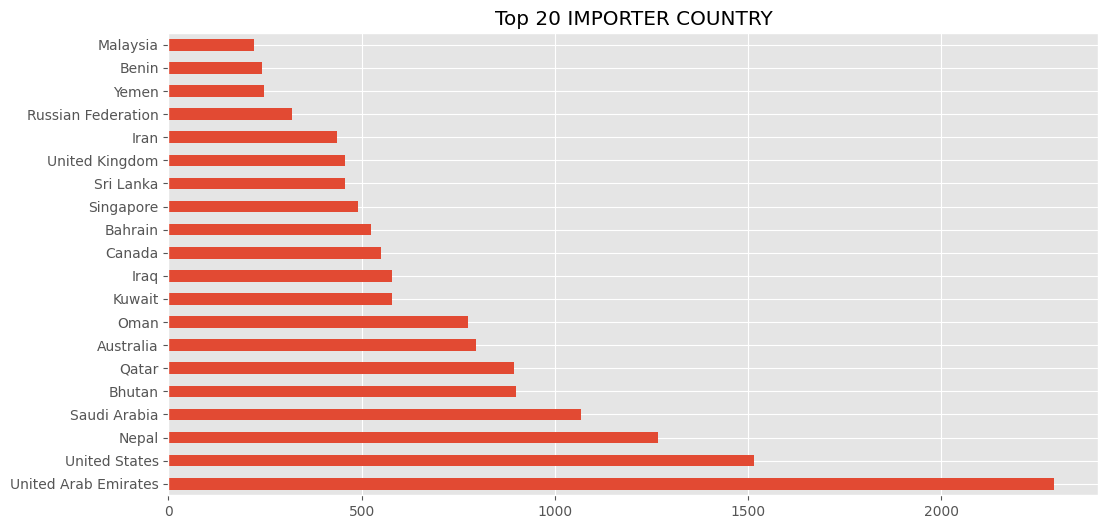

In [25]:
top_importer_country = make_top_barh('IMPORTER COUNTRY',20)

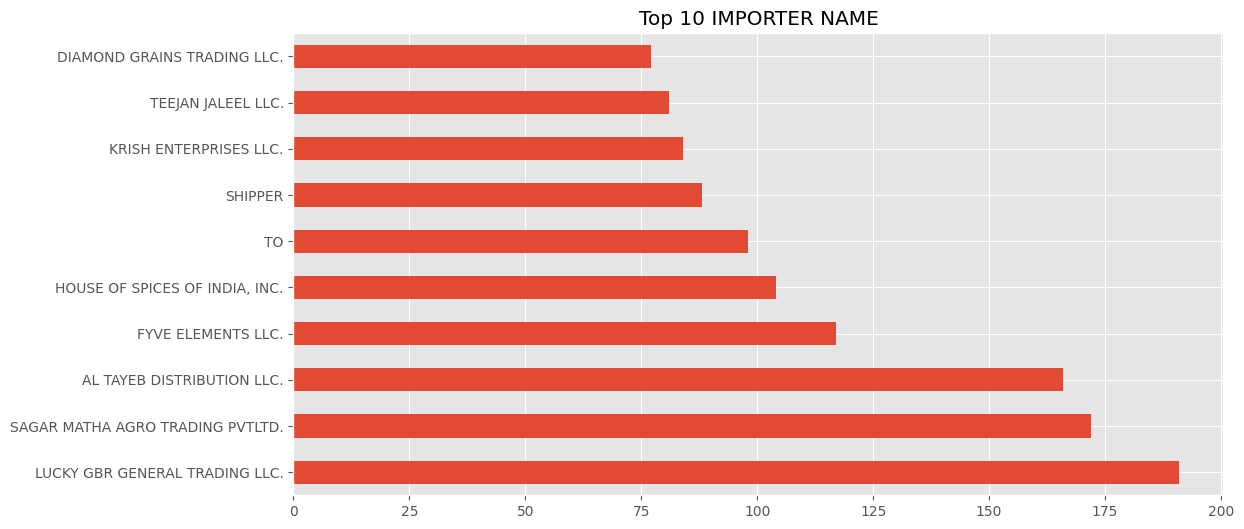

In [26]:
top_IMPORTER_NAME = make_top_barh('IMPORTER NAME',10)

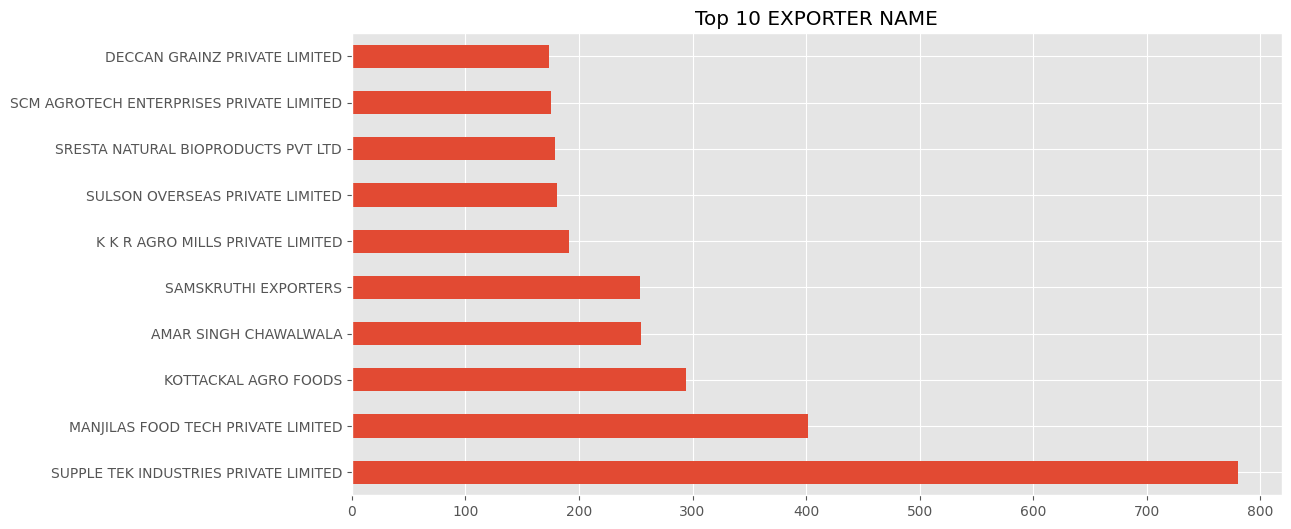

In [27]:
top_EXPORTER_NAME = make_top_barh('EXPORTER NAME',10)

In [28]:
def make_top_seaborn(col, top, hue_col=None):
    # plt.figure(figsize=(12,6))
    top_values = df[col].value_counts().head(top)
    
    # Create a DataFrame with the top values
    top_df = df[df[col].isin(top_values.index)]

    # Use Seaborn to create a horizontal bar plot with optional hue
    plt.figure(figsize=(8, 6))
    if hue_col:
        sns.countplot(y=col, hue=hue_col, data=top_df)
    else:
        sns.countplot(y=col, data=top_df)
    
    plt.title(f'Top {top} {col} with {hue_col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

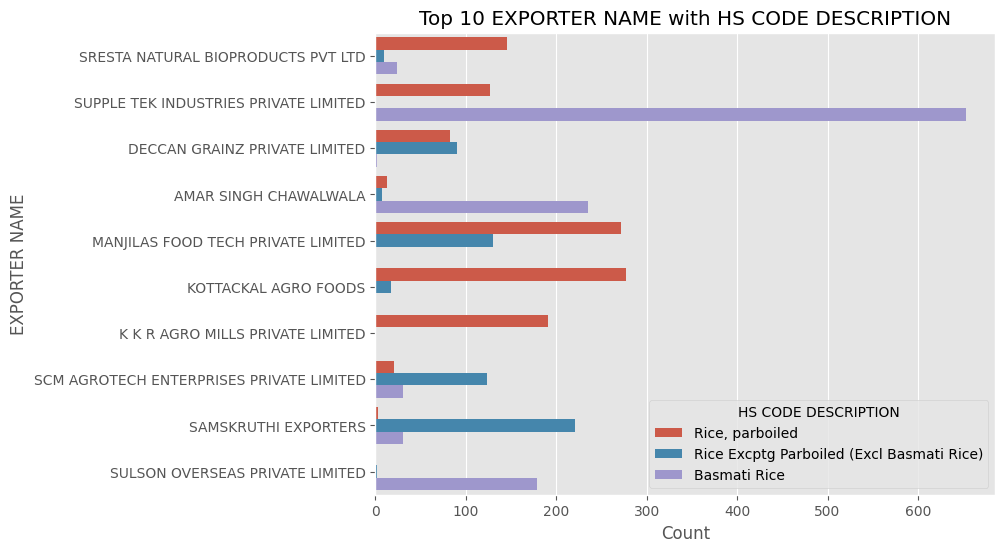

In [29]:
top_EXPORTER_NAME_with_HS_CODE = make_top_seaborn('EXPORTER NAME', 10, hue_col='HS CODE DESCRIPTION')

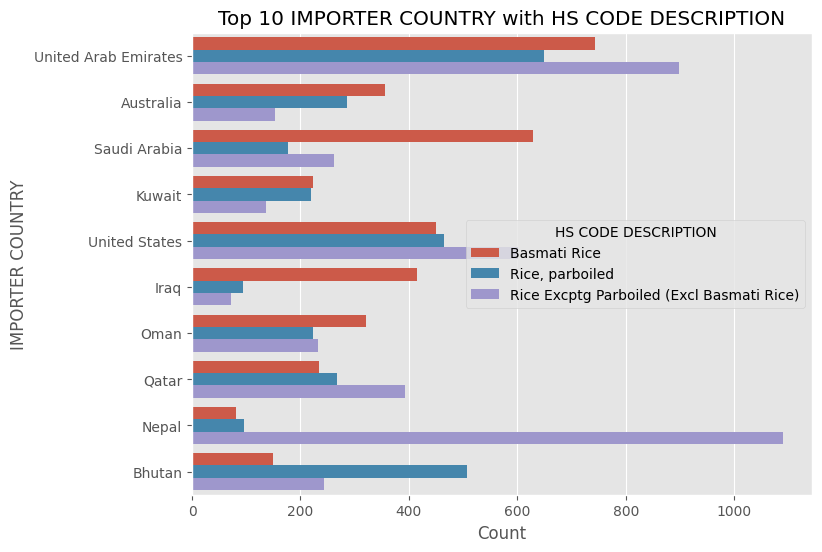

In [30]:
top_IMPORTER_COUNTRY_with_HS_CODE_DESCRIPTION = make_top_seaborn('IMPORTER COUNTRY', 10, hue_col='HS CODE DESCRIPTION')

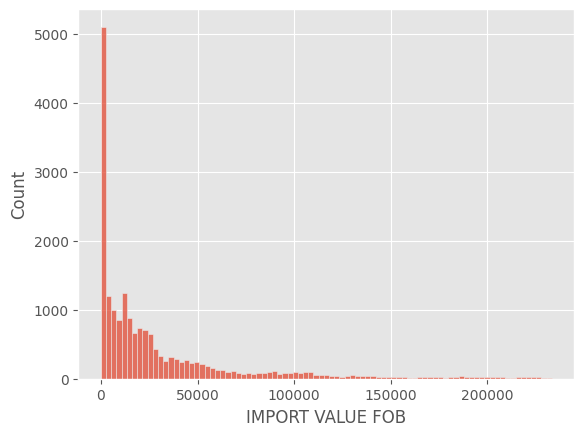

In [31]:
sns.histplot(data=df, x = 'IMPORT VALUE FOB'); plt.show()

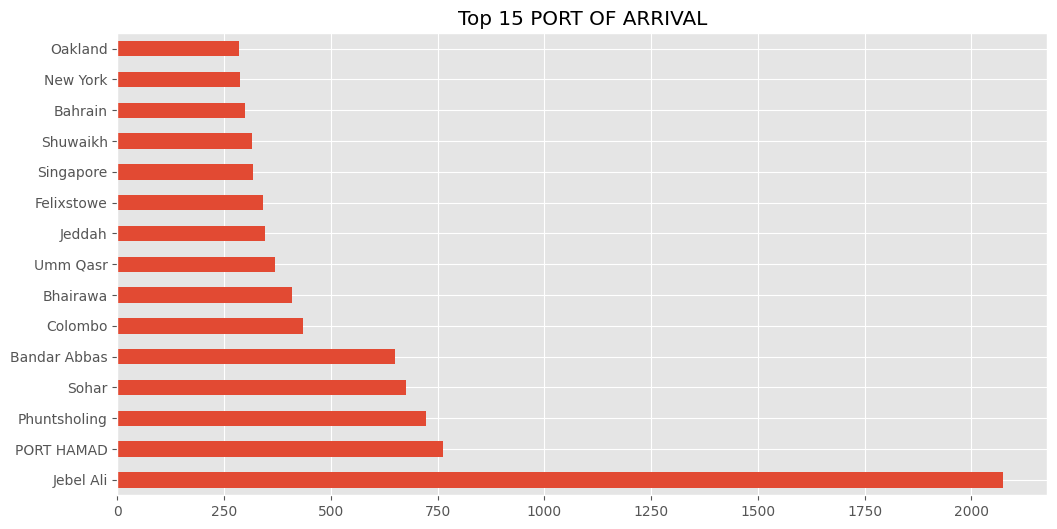

In [32]:
make_top_barh('PORT OF ARRIVAL', 15)

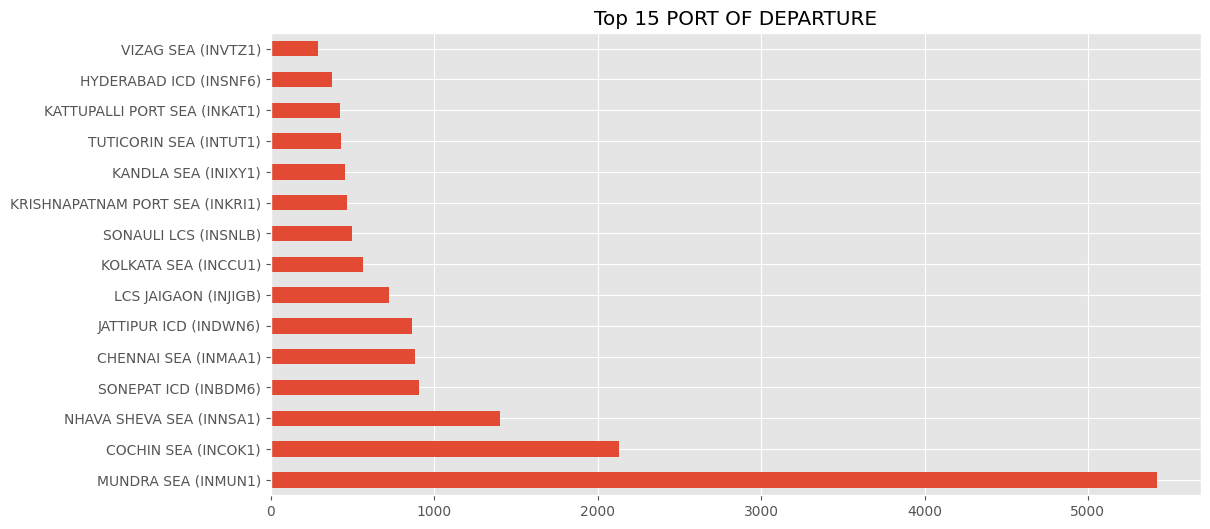

In [33]:
make_top_barh('PORT OF DEPARTURE', 15)

###  Task 1: Identify the top importers and exporters based on the total import value (CIF) and quantity of rice exported.

In [34]:
# Group by importer and calculate the total import value and quantity
top_importers_value = df.groupby('IMPORTER NAME')['IMPORT VALUE CIF'].sum().sort_values(ascending=False).head(10)
top_importers_quantity = df.groupby('IMPORTER NAME')['QUANTITY'].sum().sort_values(ascending=False).head(10)

# Group by exporter and calculate the total import value and quantity
top_exporters_value = df.groupby('EXPORTER NAME')['IMPORT VALUE CIF'].sum().sort_values(ascending=False).head(10)
top_exporters_quantity = df.groupby('EXPORTER NAME')['QUANTITY'].sum().sort_values(ascending=False).head(10)

# Print or visualize the top importers and exporters
print("Top Importers based on Import Value (CIF):")
print(top_importers_value)

print("\nTop Importers based on Quantity of Rice Exported:")
print(top_importers_quantity)

print("\nTop Exporters based on Import Value (CIF):")
print(top_exporters_value)

print("\nTop Exporters based on Quantity of Rice Exported:")
print(top_exporters_quantity)

Top Importers based on Import Value (CIF):
IMPORTER NAME
PERUSAHAAN PERDAGANGAN INDONESIA (PERSERO)    66360.0
""                                                0.0
PEARL IMPERIAL GENERAL TRADING LLC.               0.0
PALASH TRADERS                                    0.0
PALOUKI ABIRE CLAIRE                              0.0
PALPA BHAIRAV IMPEX                               0.0
PAMIR IM UND EXPORT, GERMANY                      0.0
PANCHKANYA KHADHYA BHANDAR                        0.0
PANCHKANYA KHADYA BHANDAR                         0.0
PAR                                               0.0
Name: IMPORT VALUE CIF, dtype: float64

Top Importers based on Quantity of Rice Exported:
IMPORTER NAME
SAGAR MATHA AGRO TRADING PVTLTD.    84844.51
TEEJAN JALEEL LLC.                  35435.85
AL TAYEB DISTRIBUTION LLC.          32003.34
DIAMOND GRAINS TRADING LLC.         28560.50
CHETAK SANFRANSISCO LLC.            27854.93
RESMI INTERNATIONAL                 24986.00
JALEEL DISTRIBUTION LLC.     

### Task 2: Analyze the distribution of import values and quantities among different importers and exporters.

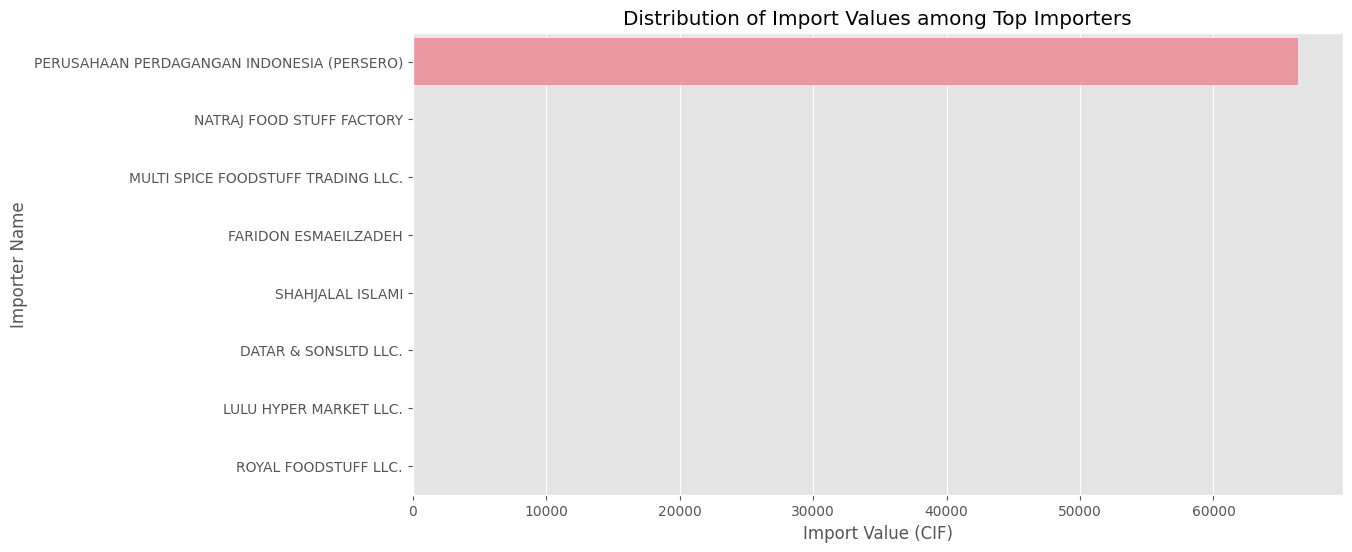

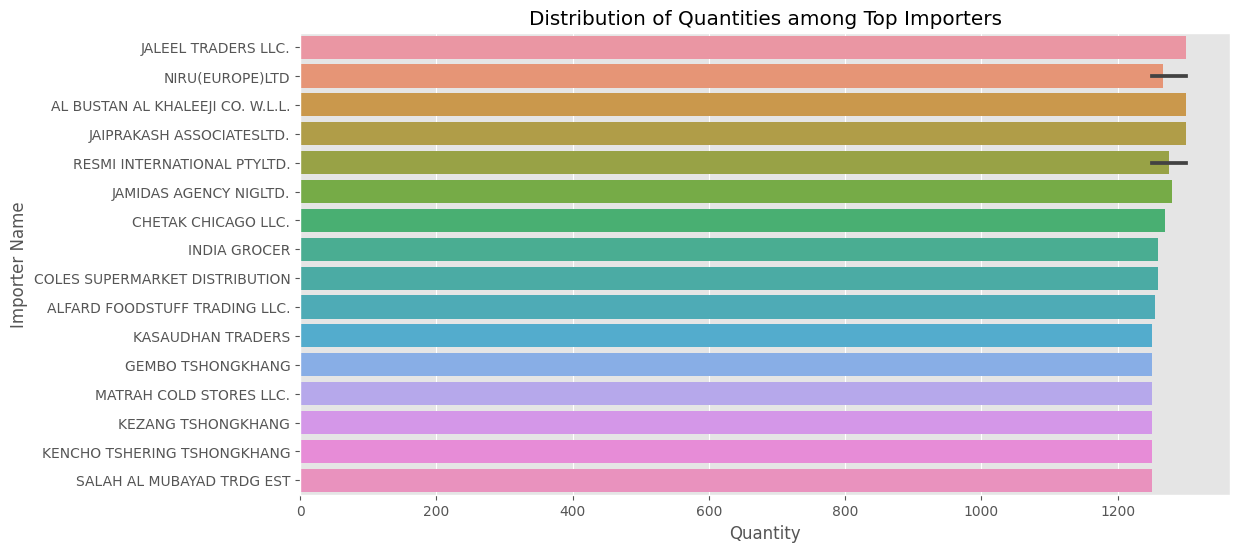

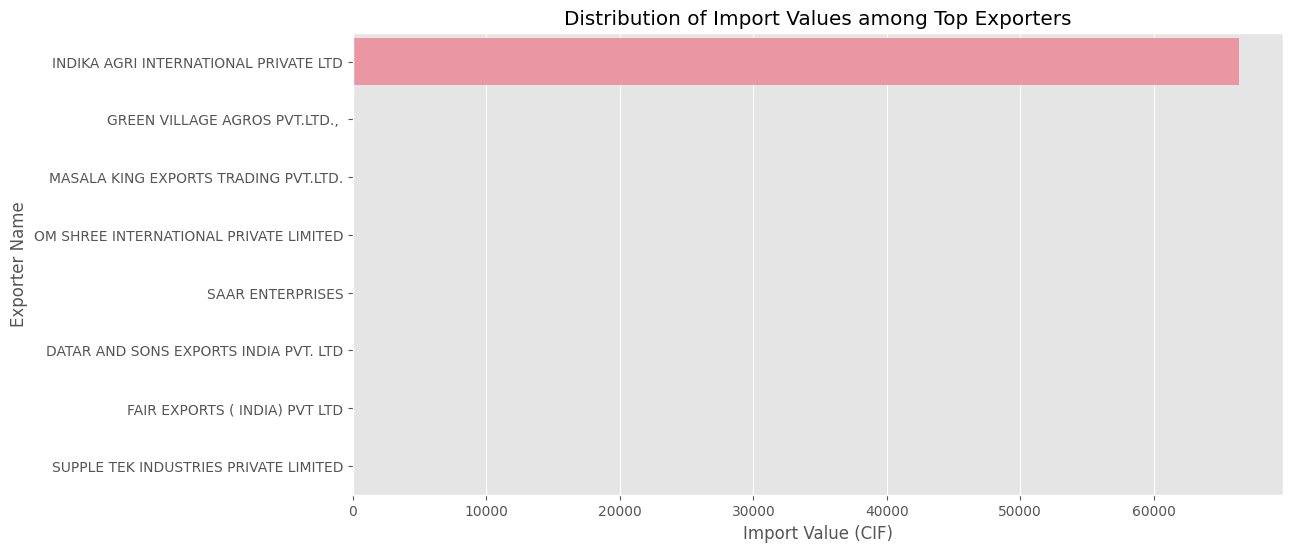

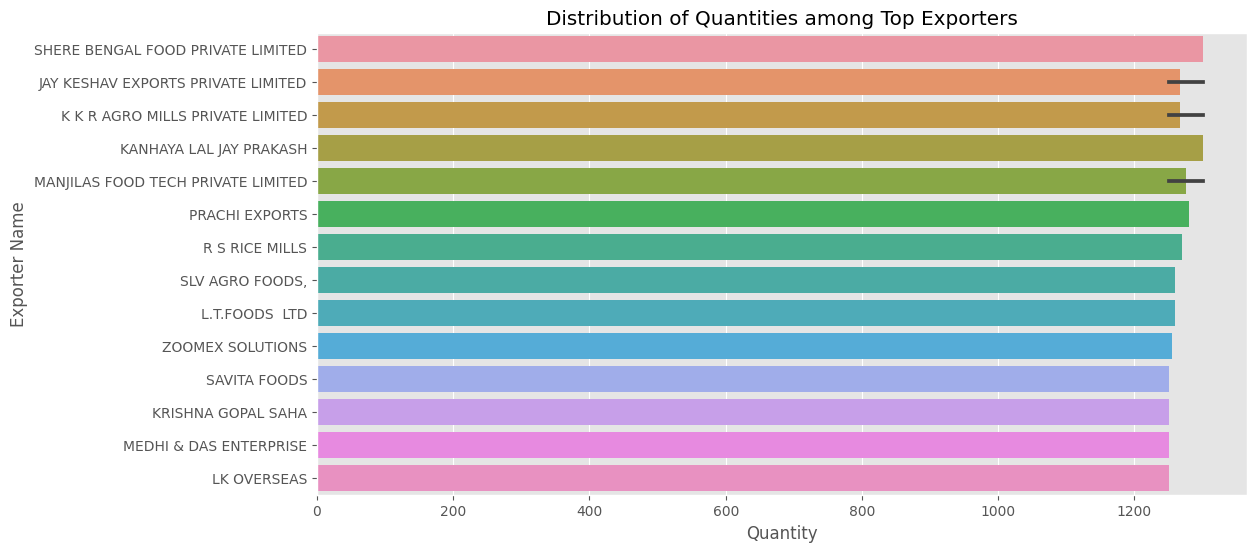

In [35]:
# Plot distribution of import values among importers
plt.figure(figsize=(12, 6))
sns.barplot(x='IMPORT VALUE CIF', y='IMPORTER NAME', data=df.sort_values('IMPORT VALUE CIF', ascending=False).head(10))
plt.title('Distribution of Import Values among Top Importers')
plt.xlabel('Import Value (CIF)')
plt.ylabel('Importer Name')
plt.show()

# Plot distribution of quantities among importers
plt.figure(figsize=(12, 6))
sns.barplot(x='QUANTITY', y='IMPORTER NAME', data=df.sort_values('QUANTITY', ascending=False).head(20))
plt.title('Distribution of Quantities among Top Importers')
plt.xlabel('Quantity')
plt.ylabel('Importer Name')
plt.show()

# Plot distribution of import values among exporters
plt.figure(figsize=(12, 6))
sns.barplot(x='IMPORT VALUE CIF', y='EXPORTER NAME', data=df.sort_values('IMPORT VALUE CIF', ascending=False).head(10))
plt.title('Distribution of Import Values among Top Exporters')
plt.xlabel('Import Value (CIF)')
plt.ylabel('Exporter Name')
plt.show()

# Plot distribution of quantities among exporters
plt.figure(figsize=(12, 6))
sns.barplot(x='QUANTITY', y='EXPORTER NAME', data=df.sort_values('QUANTITY', ascending=False).head(20))
plt.title('Distribution of Quantities among Top Exporters')
plt.xlabel('Quantity')
plt.ylabel('Exporter Name')
plt.show()


## 3. Geographical Analysis:
 - Explore the geographical distribution of exporters and importers, highlighting the countries
involved in rice trade.
-  Visualize trade routes, analyzing the impact of different ports of arrival and departure on the
trade

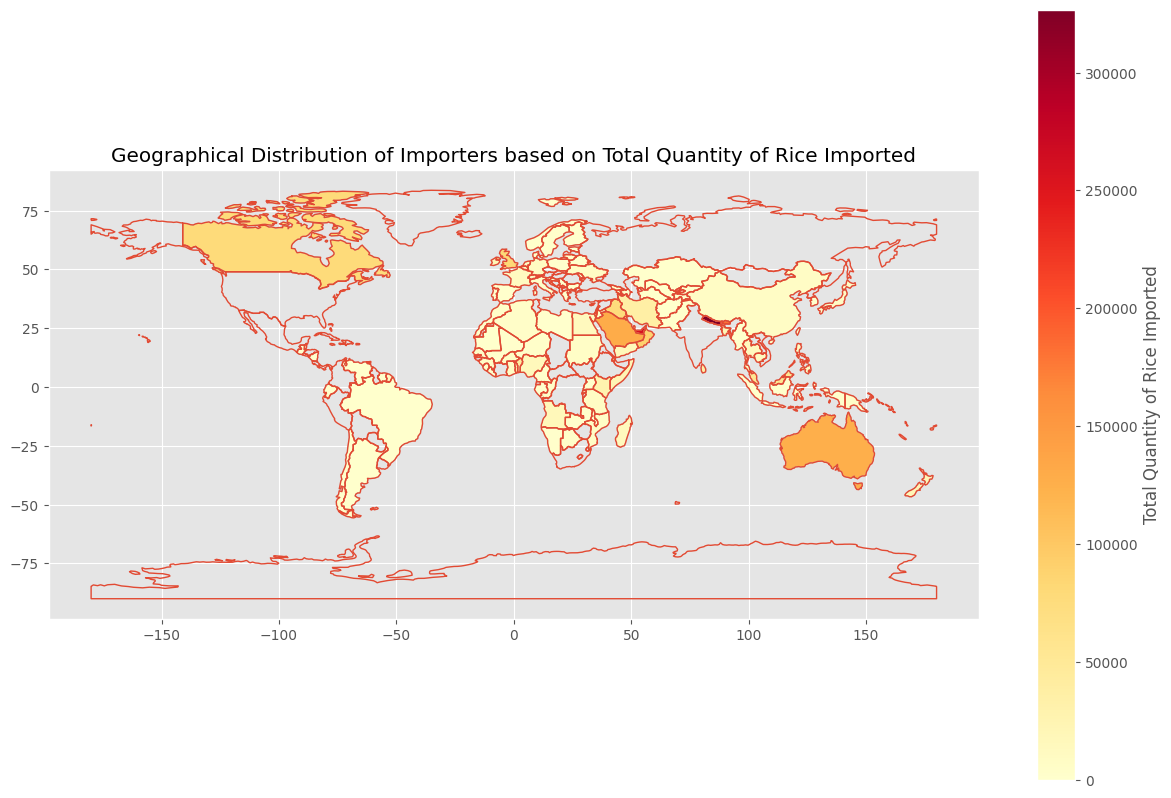

In [54]:
# Group by Importer Country and sum the total quantity
importer_distribution = df.groupby('IMPORTER COUNTRY')['QUANTITY'].sum().reset_index()

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the importer distribution data
world = world.merge(importer_distribution, left_on='name', right_on='IMPORTER COUNTRY', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='QUANTITY', ax=ax, legend=True, linewidth=0.8, edgecolor='0.8', cmap='YlOrRd', legend_kwds={'label': "Total Quantity of Rice Imported"})
ax.set_title('Geographical Distribution of Importers based on Total Quantity of Rice Imported')
plt.show()

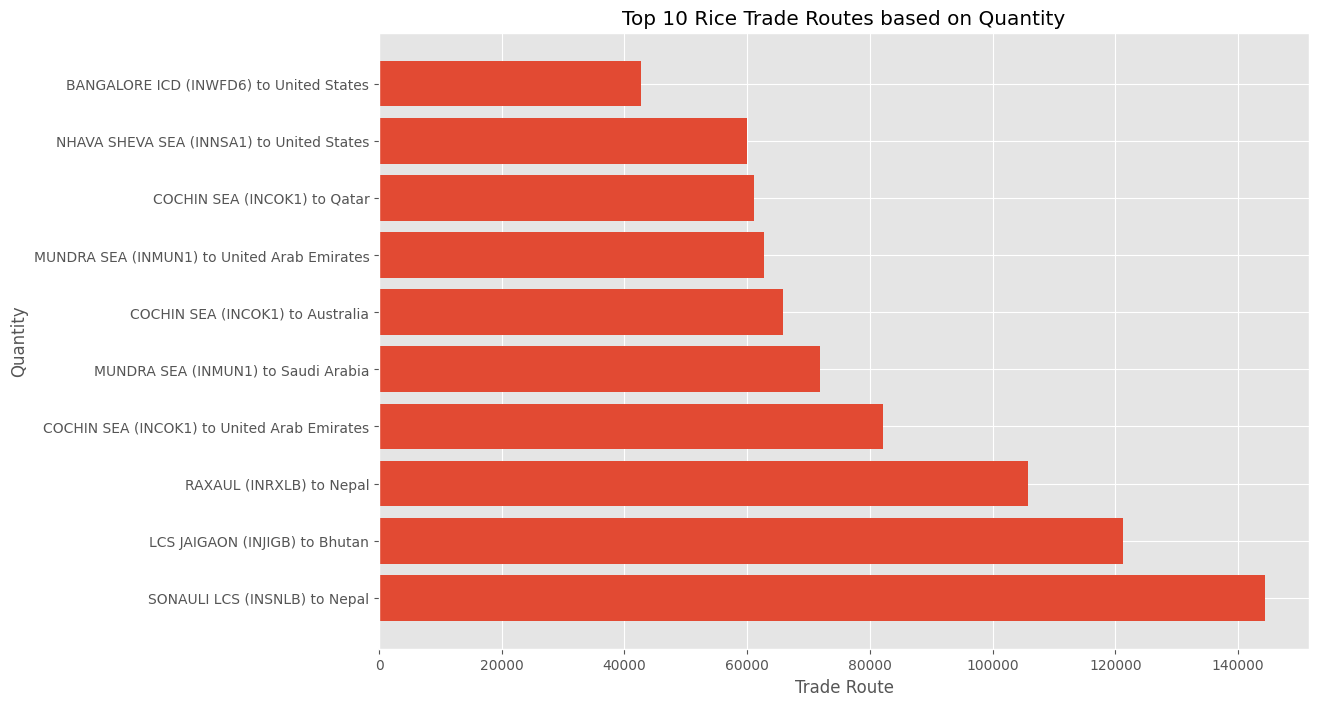

In [38]:
# Grouping by importer and exporter countries
grouped_data = df.groupby(['IMPORTER COUNTRY', 'PORT OF DEPARTURE']).sum().reset_index()

# Sorting the data by quantity in descending order and selecting the top 10
top_10_routes = grouped_data.sort_values(by='QUANTITY', ascending=False).head(10)

# Plotting a bar chart for the quantity of rice traded between top 10 trade routes
plt.figure(figsize=(12, 8))
plt.barh(top_10_routes['PORT OF DEPARTURE'] + ' to ' + top_10_routes['IMPORTER COUNTRY'], top_10_routes['QUANTITY'])
plt.xlabel('Trade Route')
plt.ylabel('Quantity')
plt.title('Top 10 Rice Trade Routes based on Quantity')
plt.show()

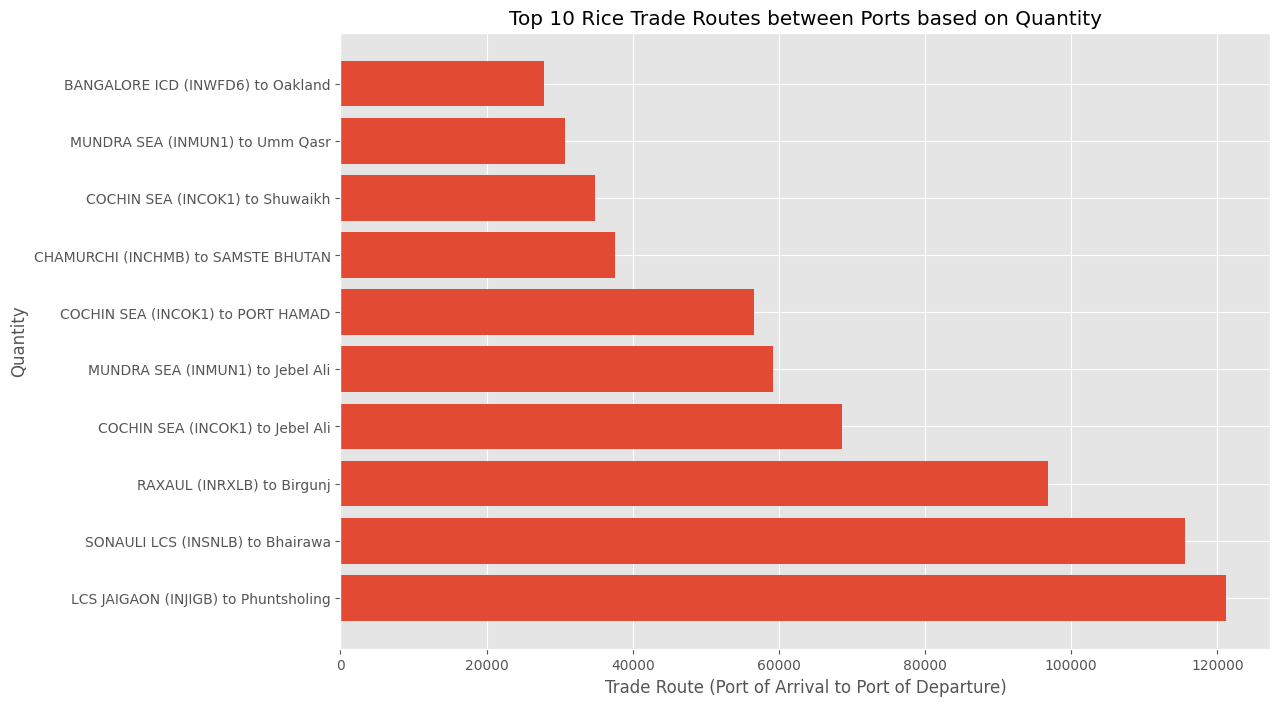

In [39]:
# Grouping by ports of arrival and departure
grouped_ports = df.groupby(['PORT OF ARRIVAL', 'PORT OF DEPARTURE']).sum().reset_index()

# Sorting the data by quantity in descending order and selecting the top 10
top_10_ports = grouped_ports.sort_values(by='QUANTITY', ascending=False).head(10)

# Plotting a bar chart for the quantity of rice traded between top 10 port routes
plt.figure(figsize=(12, 8))
plt.barh(top_10_ports['PORT OF DEPARTURE'] + ' to ' + top_10_ports['PORT OF ARRIVAL'], top_10_ports['QUANTITY'])
plt.xlabel('Trade Route (Port of Arrival to Port of Departure)')
plt.ylabel('Quantity')
plt.title('Top 10 Rice Trade Routes between Ports based on Quantity')
plt.show()

## 4. Product Analysis:
- Investigate the variety of rice products being exported, including their quantities, values, and
packaging details.
- Identify the top rice varieties and packaging methods preferred in the export transactions.
